In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../resources/MY2022 Fuel Consumption Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [3]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


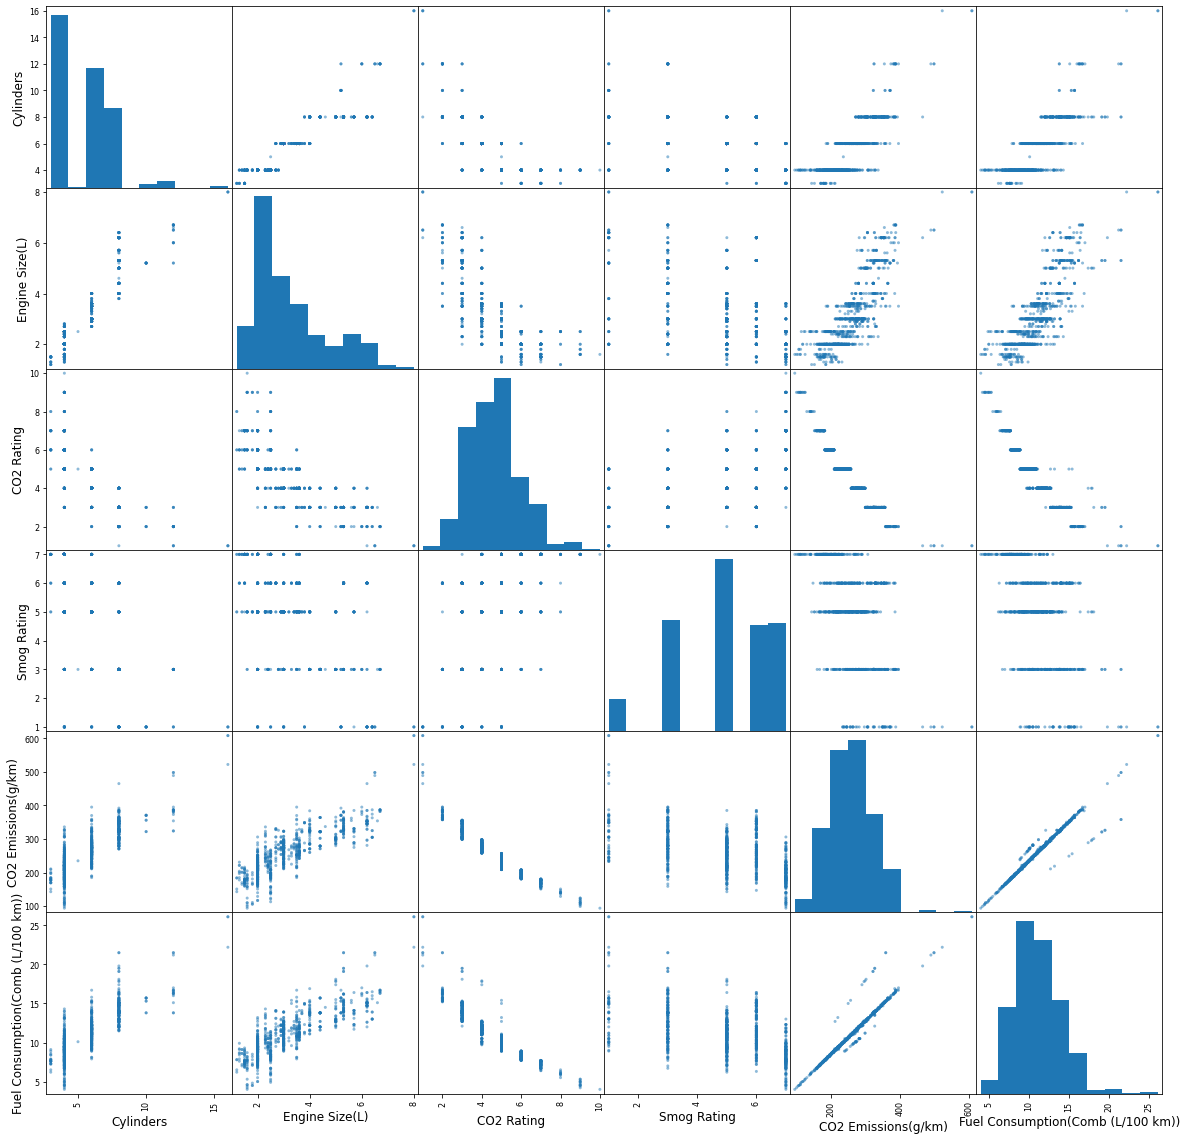

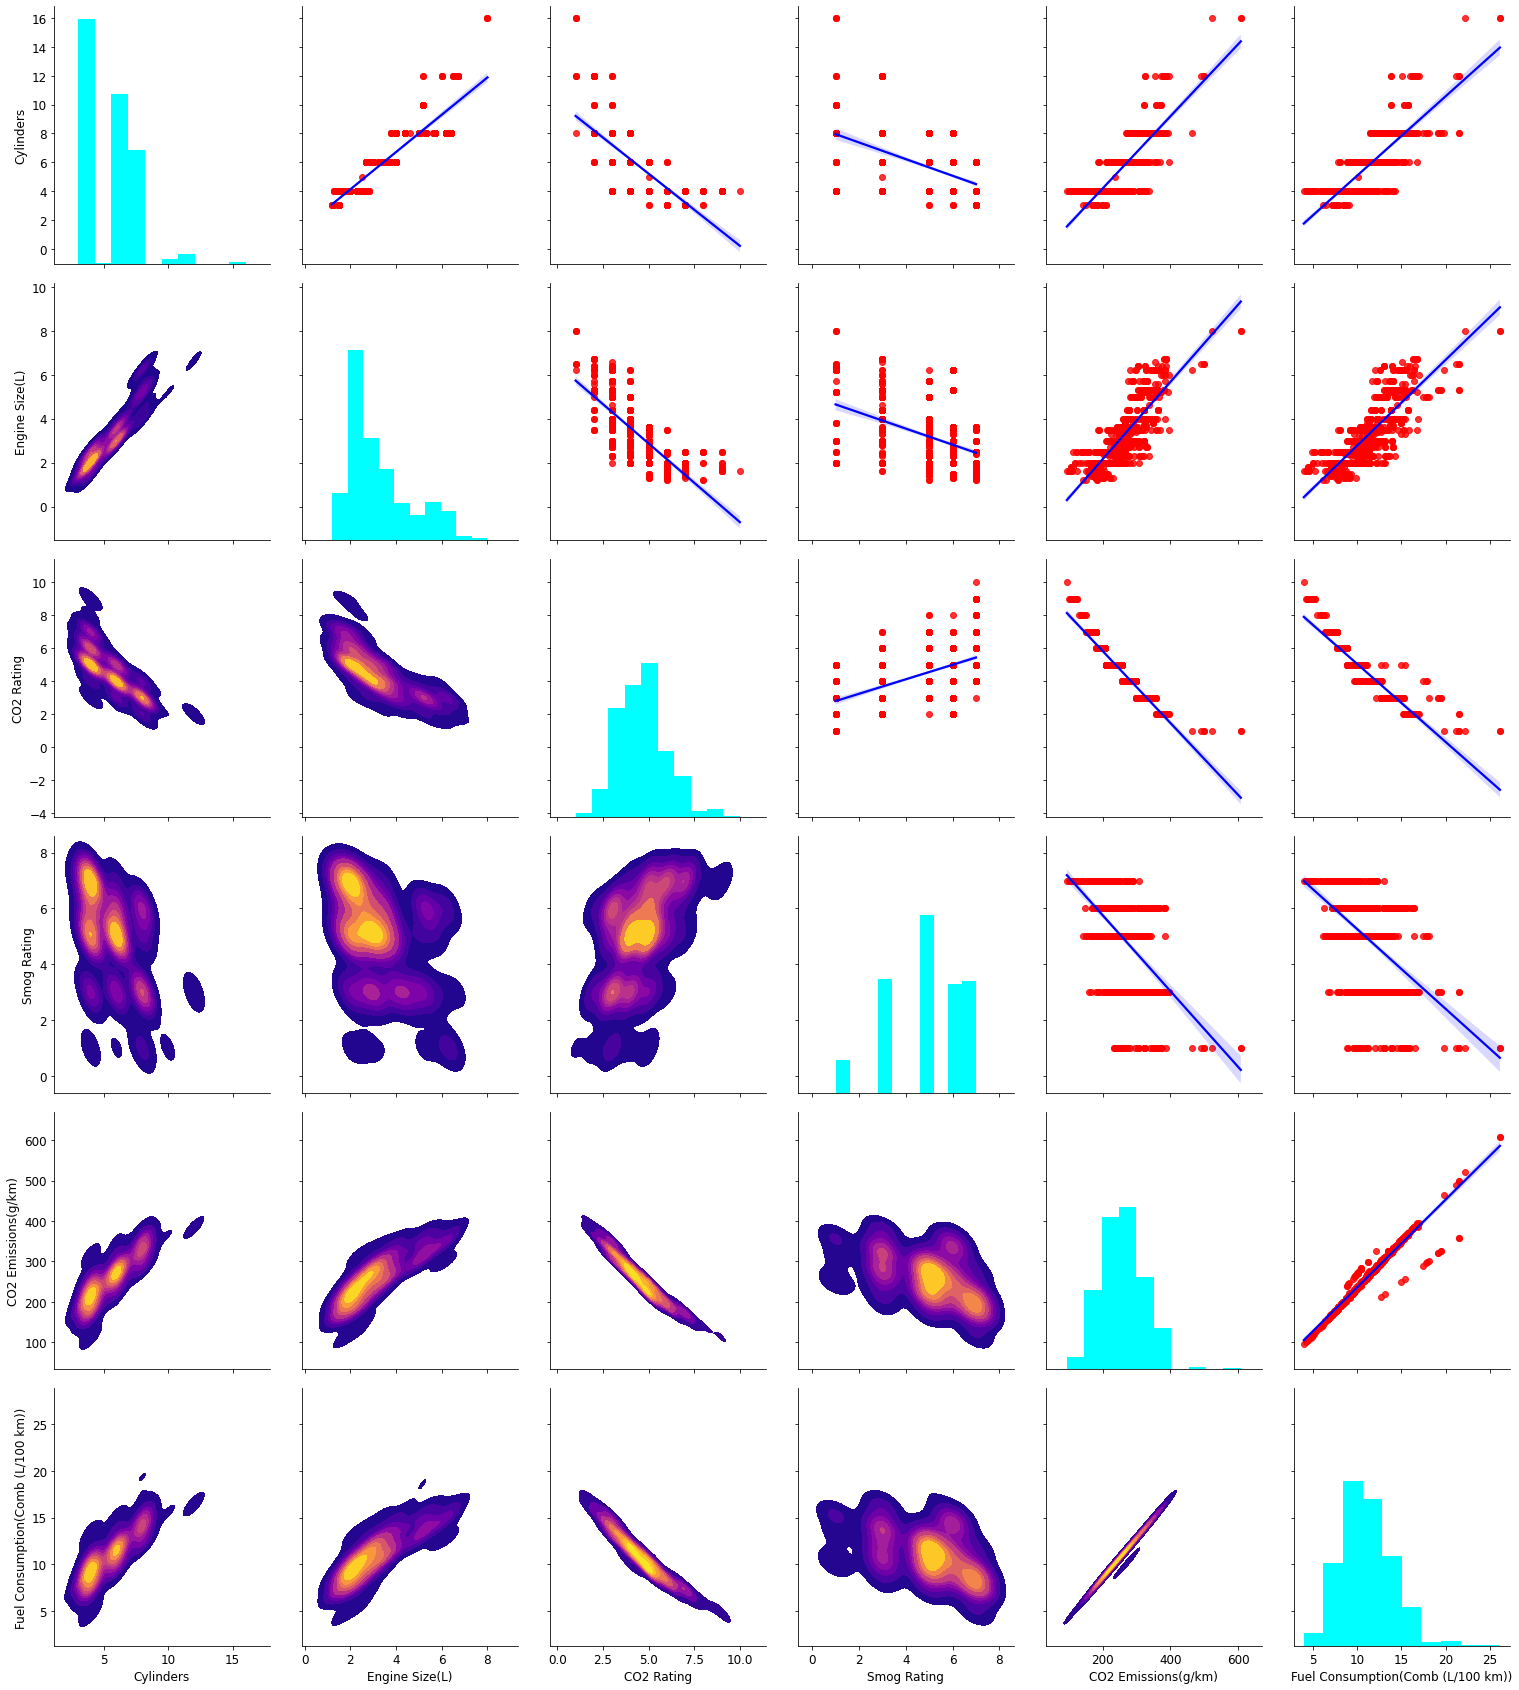

In [5]:
from pandas.plotting import scatter_matrix
plt.rc('font', size=12)
scatter_matrix(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], figsize=(20, 20))
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], height=4, aspect=0.9)
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.kdeplot, cmap="plasma", shade=True, thresh=0.05)
g.map_diag(plt.hist,color = 'cyan')

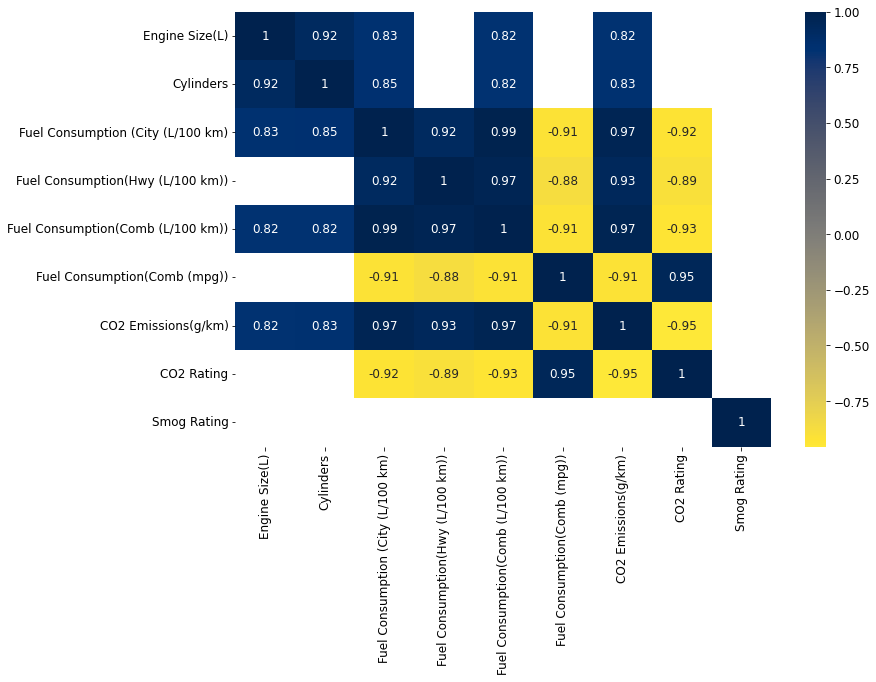

In [6]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

In the data processing process, the model year, fuel usage (city, highway, mpg), model name, and smog rating are excluded because they are unused features.

In [7]:
df_sort = df[df.columns.drop(['Model Year','Fuel Consumption (City (L/100 km)', 
            'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))', 'Model', 'Smog Rating'])]
            
df_sort.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,Acura,Compact,2.4,4,AM8,Z,8.6,200,6
1,Acura,SUV: Small,3.5,6,AS10,Z,11.2,263,4
2,Acura,SUV: Small,2.0,4,AS10,Z,9.9,232,5
3,Acura,SUV: Small,2.0,4,AS10,Z,10.3,242,5
4,Acura,Compact,2.0,4,AS10,Z,9.8,230,5


Use the OrdinalEncoder to encode the brand name, car class, fuel type, and transmission numerically. 
Since the data are object types, the OrdinalEncoder operates similarly to the label encoder in the data processing process, but the method is adopted because it is used effectively in a two-dimensional array.
* Warning occurs because the error in the bottom result affects the conversion of existing data while copying. However, in the case of the preprocessing, it is okay to ignore the warning because the original is also modified. Therefore, the result of output after the encoding process is the dataframe after classification.

In [8]:
z = df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
z_res = pd.DataFrame(z)
df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res
df_sort

C:\Users\User\AppData\Local\Temp\ipykernel_36616\226076172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,0.0,0.0,2.4,4,7.0,3.0,8.6,200,6
1,0.0,7.0,3.5,6,8.0,3.0,11.2,263,4
2,0.0,7.0,2.0,4,8.0,3.0,9.9,232,5
3,0.0,7.0,2.0,4,8.0,3.0,10.3,242,5
4,0.0,0.0,2.0,4,8.0,3.0,9.8,230,5
...,...,...,...,...,...,...,...,...,...
941,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
942,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
943,38.0,7.0,2.0,4,12.0,3.0,9.9,232,5
944,38.0,8.0,2.0,4,12.0,3.0,10.1,236,5


Data are divided into feature data, encoding data, and targets.

In [9]:
df_num = df_sort[['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))']]
df_cat = df_sort[['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']]
df_rate = df_sort[['CO2 Emissions(g/km)', 'CO2 Rating']]
df_rate

,CO2 Emissions(g/km),CO2 Rating
0,200,6
1,263,4
2,232,5
3,242,5
4,230,5
...,...,...
941,219,5
942,219,5
943,232,5
944,236,5


Normalization is carried out using StandardScaler. This is because it is easy to respond to outliers and is commonly used data.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled_df = pd.DataFrame(df_scaled, columns=['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))'])
df_scaled_df



,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km))
0,-0.581281,-0.863551,-0.866881
1,0.219250,0.171835,0.037543
2,-0.872384,-0.863551,-0.414669
3,-0.872384,-0.863551,-0.275527
4,-0.872384,-0.863551,-0.449455
...,...,...,...
941,-0.872384,-0.863551,-0.588597
942,-0.872384,-0.863551,-0.588597
943,-0.872384,-0.863551,-0.414669
944,-0.872384,-0.863551,-0.345098


In [11]:
df_result_sum = pd.concat([df_scaled_df, df_cat], axis = 1)
df_result_sum.loc[[10,11,12],:]

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
10,-0.217404,0.171835,0.176686,1.0,2.0,3.0,3.0
11,-0.872384,-0.863551,-0.623382,1.0,7.0,3.0,3.0
12,-0.872384,-0.863551,-0.519026,1.0,7.0,3.0,3.0


In the area, about train and test x train y, of the overall column train that CO2, 02 rating c emissions (km and g) as divided into two case.
Train_1 represents data on c02 ratin, and train_2 represents data on CO2 Emissions (g/km).

In [12]:
from sklearn.model_selection import train_test_split

target_co2_emission = df_rate.pop('CO2 Emissions(g/km)')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_result_sum, target_co2_emission, 
                                                            test_size = 0.2, random_state = 0)

In [13]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
X_train_2

(756, 7)
(756,)
(190, 7)
(190,)


,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
79,0.874230,1.207220,0.315828,4.0,1.0,3.0,12.0
687,-0.144628,0.171835,-0.240741,29.0,8.0,3.0,4.0
181,2.184190,1.207220,1.324609,9.0,12.0,3.0,21.0
744,-1.163486,-0.863551,-1.527807,31.0,0.0,2.0,14.0
215,1.529210,1.207220,1.150682,9.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...
835,1.820312,1.207220,0.907183,33.0,6.0,2.0,3.0
192,-1.236261,-0.863551,-0.797310,9.0,7.0,2.0,1.0
629,0.437577,1.207220,1.324609,27.0,1.0,3.0,3.0
559,1.456434,2.242605,1.602894,22.0,13.0,3.0,6.0


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Specify independent variables necessary for prediction, and specify training and test X from which independent variables are extracted.

In [15]:
columns = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission','Fuel Type', 'Fuel Consumption(Comb (L/100 km))']

X_reg_train_data = X_train_2[columns]
X_reg_test_data = X_test_2[columns]

After creating a Polynomial Regression model and learning with the values of training x and y, 
the model and predictions are returned by making predictions with test X.

(Reference: https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-function)

In [16]:
def predict_poly_regression(train_X, train_y, test_X, deg):
    regression_model = Pipeline([('poly', PolynomialFeatures(degree=deg)),
                        ('linear', LinearRegression(fit_intercept=False))])

    regression_model = regression_model.fit(train_X, train_y)
    predicted_co2 = regression_model.predict(test_X)
    return regression_model, predicted_co2

From the 2 to the 10 degree, the regression model is predicted, 
and the R square adj value is calculated to return the degree with the largest R square adj value.

(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
            https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn)

In [17]:
def get_degree(train_X, train_y, test_X, test_Y):
    max_r2_adj = 0
    max_degree_r2_adj = 0
    for deg in range(2, 11):
        regression_model, predicted_co2 = predict_poly_regression(train_X, train_y, test_X, deg)
        r_score = r2_score(test_Y, predicted_co2)
        n = len(test_Y)
        r2_adj = 1 - (1 - r_score) * (n - 1) / (n - len(columns) - 1)
        
        if max_r2_adj < r2_adj:
            max_r2_adj = r2_adj
            max_degree_r2_adj = deg
            
    return max_degree_r2_adj

Find the optimal degree, and print the predicted value with optimal degree.

In [18]:
deg = get_degree(X_reg_train_data, y_train_2, X_reg_test_data, y_test_2)
print("Degree: {0}".format(deg))
regression_model, predicted_co2 = predict_poly_regression(X_reg_train_data, y_train_2, X_reg_test_data, deg)

compare_df = pd.DataFrame({'Actual_CO2':y_test_2, 'Predicted_CO2':predicted_co2})
compare_df

Degree: 3


,Actual_CO2,Predicted_CO2
869,178,177.758491
935,193,192.978599
657,256,255.338167
362,249,249.404859
255,279,282.052398
...,...,...
483,252,249.565914
372,275,271.967918
331,359,355.795636
270,305,304.935045


In [19]:
Features = ['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))', 'Vehicle Class', 'Fuel Type', 'Transmission'] # X variable
X_names = df_result_sum[Features] # set col names (scaled)
Y_names = df['CO2 Rating'] # label to predit
X_train, X_test, Y_train, Y_test = train_test_split(X_names, Y_names, random_state = 0) #split train & test
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, Y_train)
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  4.701293213069579
The Coefficients of mutiple linear regression model is:  [-0.11566728  0.08543453 -1.26488102 -0.00558004 -0.10701472  0.0152127 ]


In [21]:
FeatureImportance = pd.DataFrame(importance, columns = ["feature_importances"])
FeatureImportance['Features'] = Features
FeatureImportance = FeatureImportance[['Features','feature_importances']]
FeatureImportance = FeatureImportance.sort_values(by = 'feature_importances', ascending = False)
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x='Features', y='feature_importances', data = FeatureImportance, palette = 'hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

NameError: name 'importance' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
Features = ['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))', 'Vehicle Class', 'Fuel Type', 'Transmission']
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=Features, y=importance, palette = 'hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

sklearn provides an Function that can easily do kfold.
The cross_val_score() funtion take the dataset , cross-validation configuration 
and returning a list of scores calculated for each fold.

evaluate the regression model with k-foldcross-validation.
in kfold function, set k=10, a popular default and shuffle the dataset ramdoly because dataset is sorted by a specific column

In [ ]:
# import library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
features = df_result_sum[columns]
target_co2_rating = df['CO2 Emissions(g/km)']

In [ ]:
def kfoldValidation(regression_model,X,y,k):
    kfold = KFold(n_splits=k, shuffle=True ,random_state=0)
    scores = cross_val_score(regression_model, X, y, cv=kfold)
    return scores

k fold accuracy(k = 10)
Cross-Validation Accuracy : [0.99887888 0.99815579 0.99931724 0.99861048 0.99905099 0.99784782
 0.99926598 0.99921638 0.99892981 0.99914857]
Cross-Validation Mean Accuracy : 0.999


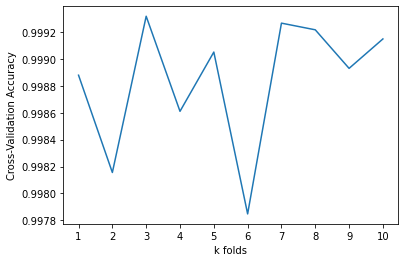

In [ ]:
scores = kfoldValidation(regression_model,features,target_co2_rating,10)

print("k fold accuracy(k = 10)")
print("Cross-Validation Accuracy : " + '{}'.format(scores))
print("Cross-Validation Mean Accuracy : " + '{:.3f}'.format(scores.mean()))

x = np.arange(1, 11)

plt.plot(x, scores)
plt.xlabel('k folds')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 11))
plt.show()

Test for various values of k in k fold validation, not when k is 10

Test For various values of k beteween k=2 ~ k=20
[k=2] : Cross-Validation Mean Accuracy : 0.999
[k=3] : Cross-Validation Mean Accuracy : 0.998
[k=4] : Cross-Validation Mean Accuracy : 0.998
[k=5] : Cross-Validation Mean Accuracy : 0.998
[k=6] : Cross-Validation Mean Accuracy : 0.999
[k=7] : Cross-Validation Mean Accuracy : 0.999
[k=8] : Cross-Validation Mean Accuracy : 0.999
[k=9] : Cross-Validation Mean Accuracy : 0.999
[k=10] : Cross-Validation Mean Accuracy : 0.999
[k=11] : Cross-Validation Mean Accuracy : 0.999
[k=12] : Cross-Validation Mean Accuracy : 0.999
[k=13] : Cross-Validation Mean Accuracy : 0.999
[k=14] : Cross-Validation Mean Accuracy : 0.999
[k=15] : Cross-Validation Mean Accuracy : 0.999
[k=16] : Cross-Validation Mean Accuracy : 0.999
[k=17] : Cross-Validation Mean Accuracy : 0.999
[k=18] : Cross-Validation Mean Accuracy : 0.999
[k=19] : Cross-Validation Mean Accuracy : 0.999
[k=20] : Cross-Validation Mean Accuracy : 0.999


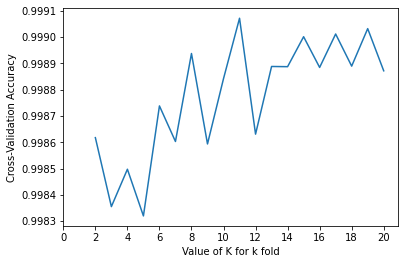

In [ ]:
print("Test For various values of k beteween k=2 ~ k=20")
k_range = range(2,21)
k_scores = []      
for k in k_range :
    scores = kfoldValidation(regression_model,features,target_co2_rating,k)
    print("[k=" + str(k) +"] : " + "Cross-Validation Mean Accuracy : " + '{:.3f}'.format(scores.mean()))
    k_scores.append(scores.mean()) 
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for k fold')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks([0, 2, 4, 6 ,8 ,10 ,12 ,14, 16, 18, 20])
plt.show()